In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Example 3d using matplotlib bar3d

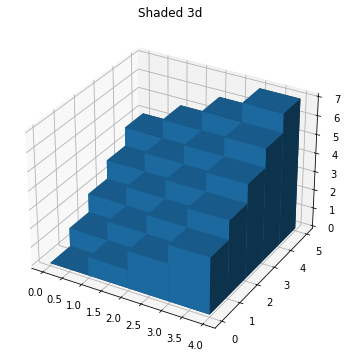

In [2]:
# setup the figure and axes
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(111, projection='3d')

# fake data
_x = np.arange(4)
_y = np.arange(5)
_xx, _yy = np.meshgrid(_x, _y)
x, y = _xx.ravel(), _yy.ravel()

top = x + y
bottom = np.zeros_like(top)
width = depth = 1

ax1.bar3d(x, y, bottom, width, depth, top, shade=True)
ax1.set_title('Shaded 3d')

plt.show()

### Import some data into a dataframe

In [3]:
import pandas as pd
df = pd.read_excel('https://s3.eu-west-1.amazonaws.com/neueda.conygre.com/pydata/Power_prices.xlsx', sheet_name="Power prices",
                 skiprows=3, index_col='Name', parse_dates=True)

df.index.rename('Date', inplace=True)
print(df.shape)
df.head()

(1239, 24)


,US Baseload Electricity 22,US Baseload Electricity 23,US Baseload Electricity 24,GER Baseload 1Y,GER Baseload 2Y,GER Baseload 3Y,ITA Baseload 1Y,ITA Baseload 2Y,ITA Baseload 3Y,SPA Baseload 1Y,...,Nordic Baseload 3Y,JPN Baseload 1Y,China Thermal Coal 1Y,China Thermal Coal 2Y,China Thermal Coal 3Y,NewC Thermal Coal 1Y,NewC Thermal Coal 2Y,NewC Thermal Coal 3Y,TTF Nat Gas 1M,EUA ETS
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-02,24.80,25.45,26.40,NaN,NaN,NaN,44.54,43.59,NaN,44.25,...,21.45,NaN,495.6,492.8,526.0,77.15,73.75,74.30,18.250,6.14
2017-01-03,24.80,25.45,26.40,NaN,NaN,NaN,44.37,43.00,NaN,43.70,...,20.88,NaN,495.6,492.8,526.0,73.25,71.50,72.05,18.250,5.44
2017-01-04,25.15,25.80,26.80,NaN,NaN,NaN,44.05,42.25,NaN,43.80,...,20.80,NaN,494.6,487.2,526.0,72.60,70.80,71.35,19.000,5.73
2017-01-05,25.10,25.75,26.70,NaN,NaN,NaN,44.12,42.25,NaN,44.20,...,20.90,NaN,505.0,495.6,526.0,71.40,69.90,70.45,18.800,5.30
2017-01-06,25.30,25.85,26.75,NaN,NaN,NaN,43.89,42.00,NaN,44.10,...,20.36,NaN,509.4,501.6,526.0,69.00,67.50,68.05,18.575,5.05


### Cut the DataFrame down to a smaller size

In [4]:
df_plot = df[ ['US Baseload Electricity 22', 'US Baseload Electricity 23', 'US Baseload Electricity 24'] ].resample('Y').mean()

df_plot

,US Baseload Electricity 22,US Baseload Electricity 23,US Baseload Electricity 24
Date,,,
2017-12-31,25.216342,25.532685,25.991829
2018-12-31,25.452874,25.516858,25.915900
2019-12-31,24.769540,24.784674,24.940613
2020-12-31,23.551410,23.492003,23.986227
2021-12-31,26.980129,24.893592,25.204453


### Organise the data for bar3d 

In [5]:
# the width and depth of the columns
width = depth = .8

# xrange = num rows, yrange = num cols
xrange = np.arange(df_plot.shape[0])
yrange = np.arange(df_plot.shape[1])

# return matrices from the two vectors
xpos, ypos = np.meshgrid(xrange, yrange)
xpos = xpos.flatten()
ypos = ypos.flatten()

## where the columns start (we're saying start at zero)
zpos = np.zeros(df_plot.shape).flatten()

## The height of the columns
dz = list(df_plot['US Baseload Electricity 22']) + list(df_plot['US Baseload Electricity 23'])\
     + list(df_plot['US Baseload Electricity 24'])

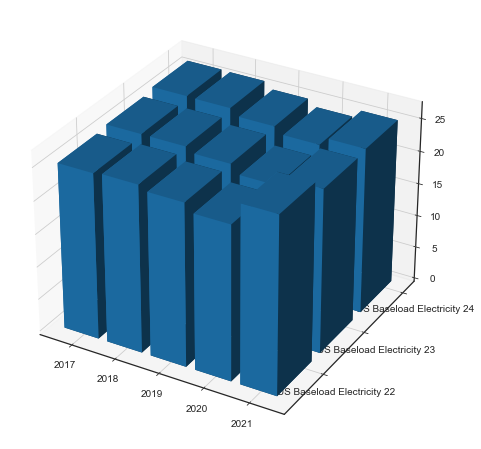

In [6]:
plt.style.use('seaborn-white')

fig3 = plt.figure(figsize=(12, 8))

ax4 = fig3.add_subplot(111, projection='3d')

# set the ticks in the middle of the bars
ax4.set_xticks(xrange + width/2)
ax4.set_yticks(yrange + 0.7)

#ax4.bar3d(xpos,ypos,zpos,dx,dy,dz)
ax4.bar3d(xpos, ypos, zpos, width, depth, dz, shade=True)

# put the column / index labels
ax4.w_yaxis.set_ticklabels(df_plot.columns)
ax4.w_xaxis.set_ticklabels(df_plot.index.format(date_format='%Y'))

plt.show()